<a href="https://colab.research.google.com/github/WaqasRauf/CS867-Assignment-03/blob/main/CV_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Useful Libraries

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm



Setting Up Kaggle

In [ ]:
!pip install --upgrade --ignore-installed kaggle

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 153kB 7.4MB/s 
     |████████████████████████████████| 235kB 36.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 143kB 37.1MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 184kB 59.6MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=e2be24c58b5be247de288608da2e47845cb4441b6aa9f1934b40dcc787ba7ed9
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=77e6616291a84e5bad4d98c6e5a2b1c8d279f30e67f6e130f3e916bdd0f9dc95
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f7

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"waqasraufkhattak","key":"f86c9d5f010151aa3e495007422b9886"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-04 18:28:24            591         92  1.0              
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               373KB  2021-01-04 19:29:43            406         51  1.0              
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11             90         23  0.875            
ashkhagan/women-representation-in-city-property-sanfrancisco   Wo

Importing Intel Image Classification form Kaggle

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:02<00:00, 147MB/s]
100% 346M/346M [00:02<00:00, 126MB/s]


In [ ]:
!unzip -q intel-image-classification.zip

Mounting Google Drive into Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf seg_pred

In [ ]:
!cp -r "/content/drive/MyDrive/seg_pred.zip" "/content/"

In [ ]:
!unzip -q seg_pred.zip

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
print(class_names_label)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


Loading Intel Image Classification Dataset

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    train_path = 'seg_train/seg_train'
    valid_path = 'seg_test/seg_test'
    datasets = [train_path, valid_path]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  3%|▎         | 65/2271 [00:00<00:03, 648.52it/s]

Loading seg_train/seg_train


 33%|███▎      | 156/474 [00:00<00:00, 1559.08it/s]

Loading seg_test/seg_test


100%|██████████| 553/553 [00:00<00:00, 1735.55it/s]


Exploring Dataset

In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


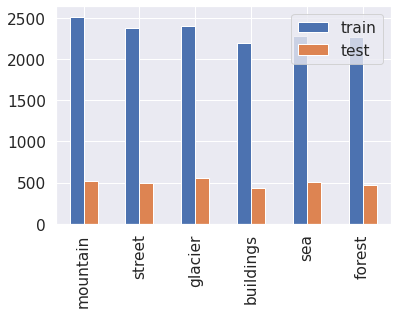

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

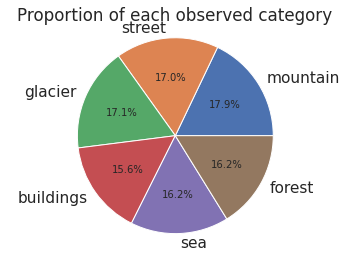

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

Scaling Dataset

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

Data Visualization

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

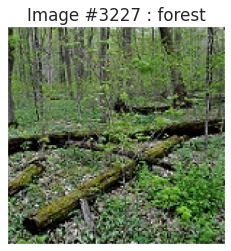

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
def display_images(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

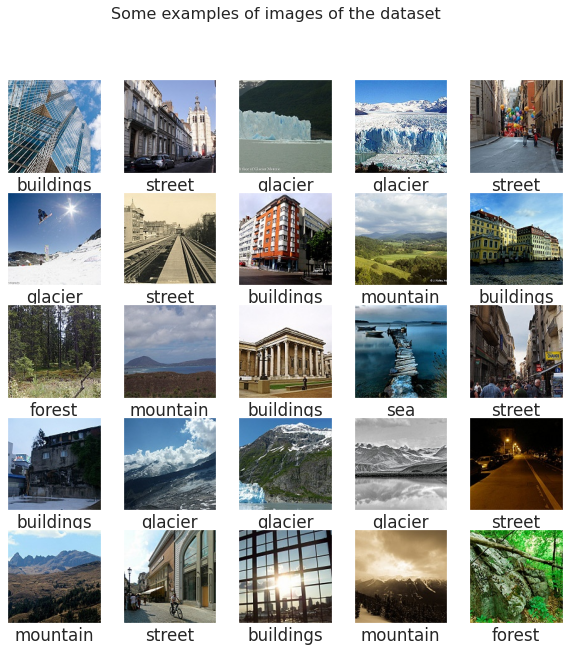

In [ ]:
display_images(class_names, train_images, train_labels)

Building CNN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

Compiling CNN Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Trainig CNN Model

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/10
98/98 [==============================] - 244s 2s/step - loss: 1.5556 - accuracy: 0.4683 - val_loss: 0.7805 - val_accuracy: 0.7100
Epoch 2/10
98/98 [==============================] - 236s 2s/step - loss: 0.7049 - accuracy: 0.7455 - val_loss: 0.7013 - val_accuracy: 0.7446
Epoch 3/10
98/98 [==============================] - 237s 2s/step - loss: 0.5410 - accuracy: 0.8018 - val_loss: 0.7473 - val_accuracy: 0.7314
Epoch 4/10
98/98 [==============================] - 238s 2s/step - loss: 0.3844 - accuracy: 0.8742 - val_loss: 0.6751 - val_accuracy: 0.7727
Epoch 5/10
98/98 [==============================] - 237s 2s/step - loss: 0.2984 - accuracy: 0.9032 - val_loss: 0.6695 - val_accuracy: 0.7820
Epoch 6/10
98/98 [==============================] - 239s 2s/step - loss: 0.1673 - accuracy: 0.9509 - val_loss: 0.7994 - val_accuracy: 0.7642
Epoch 7/10
98/98 [==============================] - 240s 2s/step - loss: 0.1205 - accuracy: 0.9691 - val_loss: 0.7939 - val_accuracy: 0.7681
Epoch 8/10
98

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

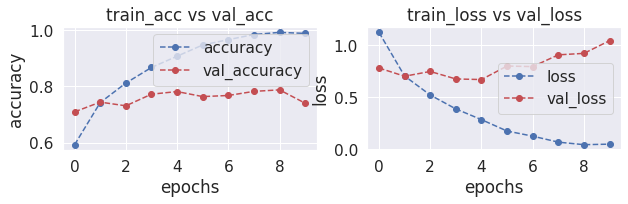

In [ ]:
plot_accuracy_loss(history)

Evaluating Performance of CNN Model

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 20s 207ms/step - loss: 1.1095 - accuracy: 0.7273


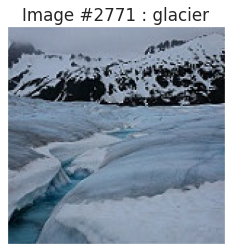

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)


Error Analysis

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

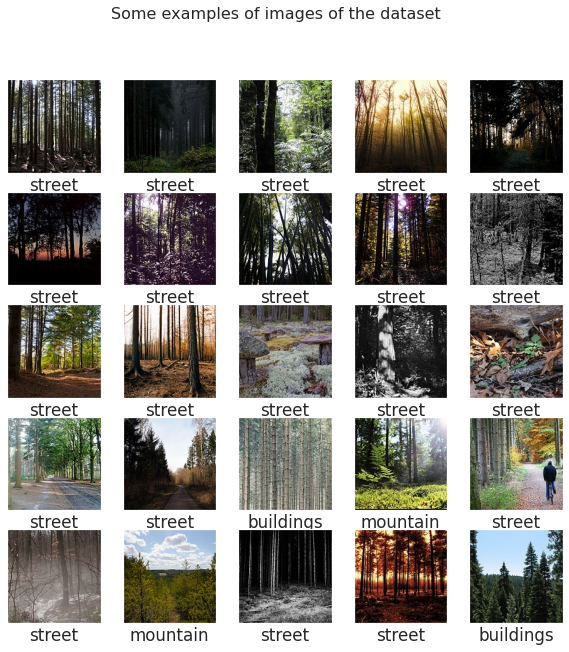

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

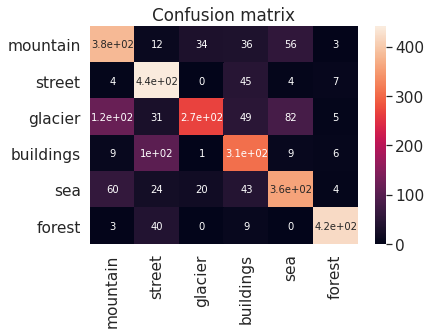

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Feature Extraction with VGG Imagenet

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


Getting Features

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

Feature Visualization through Principal Component Analysis

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) 
C1 = C[:,0]
C2 = C[:,1]

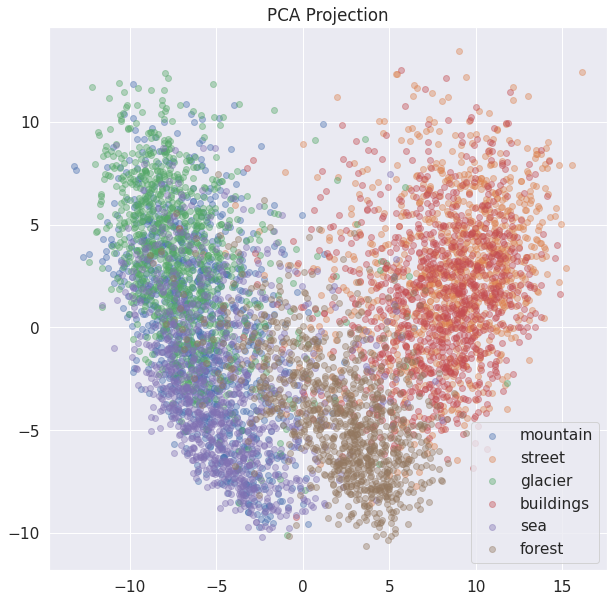

In [ ]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

Training One Single Layer

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/10
98/98 [==============================] - 2s 13ms/step - loss: 0.8129 - accuracy: 0.7080 - val_loss: 0.3822 - val_accuracy: 0.8664
Epoch 2/10
98/98 [==============================] - 1s 12ms/step - loss: 0.3229 - accuracy: 0.8839 - val_loss: 0.3934 - val_accuracy: 0.8600
Epoch 3/10
98/98 [==============================] - 1s 12ms/step - loss: 0.2372 - accuracy: 0.9186 - val_loss: 0.3326 - val_accuracy: 0.8782
Epoch 4/10
98/98 [==============================] - 1s 12ms/step - loss: 0.1946 - accuracy: 0.9373 - val_loss: 0.3360 - val_accuracy: 0.8771
Epoch 5/10
98/98 [==============================] - 1s 12ms/step - loss: 0.1560 - accuracy: 0.9493 - val_loss: 0.3696 - val_accuracy: 0.8596
Epoch 6/10
98/98 [==============================] - 1s 12ms/step - loss: 0.1462 - accuracy: 0.9537 - val_loss: 0.3379 - val_accuracy: 0.8835
Epoch 7/10
98/98 [==============================] - 1s 12ms/step - loss: 0.1116 - accuracy: 0.9676 - val_loss: 0.3835 - val_accuracy: 0.8646
Epoch 8/10
98

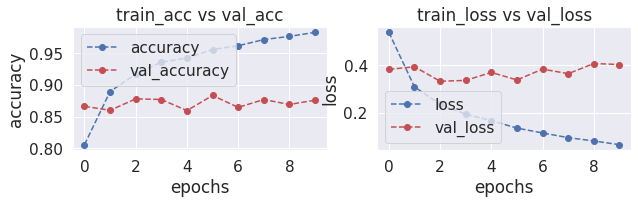

In [ ]:
plot_accuracy_loss(history2)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8710


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)


In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
88/88 [==============================] - 2s 19ms/step - loss: 0.7479 - accuracy: 0.7101 - val_loss: 0.3330 - val_accuracy: 0.8842
Epoch 2/10
88/88 [==============================] - 1s 14ms/step - loss: 0.2694 - accuracy: 0.9084 - val_loss: 0.3042 - val_accuracy: 0.8887
Epoch 3/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1965 - accuracy: 0.9317 - val_loss: 0.2839 - val_accuracy: 0.8949
Epoch 4/10
88/88 [==============================] - 1s 14ms/step - loss: 0.1270 - accuracy: 0.9617 - val_loss: 0.2457 - val_accuracy: 0.9181
Epoch 5/10
88/88 [==============================] - 1s 13ms/step - loss: 0.1109 - accuracy: 0.9680 - val_loss: 0.2382 - val_accuracy: 0.9207
Epoch 6/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0839 - accuracy: 0.9757 - val_loss: 0.2389 - val_accuracy: 0.9172
Epoch 7/10
88/88 [==============================] - 1s 14ms/step - loss: 0.0663 - accuracy: 0.9843 - val_loss: 0.2442 - val_accuracy: 0.9279
Epoch 8/10
88

In [ ]:
# save the model's trained weights
model.save_weights('vgg16_trained_wts.h5')

In [ ]:
!cp "/content/vgg16_trained_wts.h5" "/content/drive/MyDrive/"

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))


Accuracy : 0.887


In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 66)                540738    
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 402       
Total params: 541,140
Trainable params: 541,140
Non-trainable params: 0
_________________________________________________________________


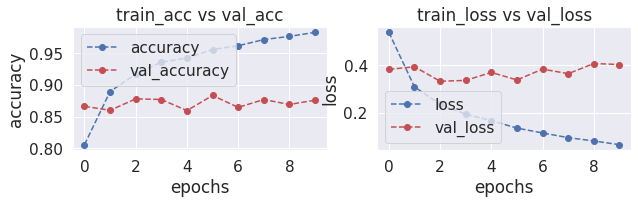

In [ ]:
plot_accuracy_loss(history2)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model2.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.871
